In this exercise, you'll be working with a dataset containing information about passengers on the Titanic. You can get more information about this dataset [here](https://www.kaggle.com/competitions/titanic). Our goal will be to build a model to predict whether a passenger survived the voyage.

Let's start by building a model using Age as a predictor variable.

When performing a train/test split, you usually want to make sure that the ratios of target values look the same in the training set and in the test set. This is especially true with imbalanced targets, where there are more observations in one class than the other. This can be done by, instead of a completely random split, by performing a **stratified** split.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
titanic_df = pd.read_csv("C:/Users/billy/OneDrive/Documents/NSS_projects/ml-exercise-02-BillyBrothers/data/titanic.csv")
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


1.  Create a DataFrame, X, which contains one column, Age, and a Series, y, which contains the target variable. Perform a 70/30 train/test split, stratifying by the target variable. Make sure that you set a random_state during this split. 

In [5]:
from sklearn.model_selection import train_test_split
X = titanic_df[["Age"]]
y = titanic_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

2. Now, try and fit a logistic regression model using the [LogisticRegression class](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). When you do this, you're likely to encounter an error, that "Input X contains NaN." If you check, you'll find that there are some missing values in the Age column. In the next step, we'll address this issue.

In [7]:
from sklearn.linear_model import LogisticRegression
#logreg = LogisticRegression()
#logreg.fit(X_train, y_train)
#logreg.predict(X_test)

One option when a column contains missing values is to **impute** them, meaning to replace the missing values with an estimate. A simple way to impute is to fill missing values using the mean value. **Important Note:** When imputing with the mean, you should calculate the mean value only on the training data. In order to have an unbiased estimate of model performance, it is important that the model has access to no information about the test set.

3. Using a [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html), fit the training data and then use it to transform both the training and test data. 

In [9]:
from sklearn.impute import SimpleImputer
imputer =  SimpleImputer()
imputer.fit(X_train)
X_train_transformed = imputer.transform(X_train)
X_test_transformed = imputer.transform(X_test)
X_train_transformed.shape

(623, 1)

4. Now, fit your logistic regression model to the training data and generate predictions on the test data.

There are multiple ways we can assess the performance of a classification model. A common way is put those predictions into a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix), which compares the predicted and actual values. 

In [11]:
logreg = LogisticRegression()
logreg.fit(X_train_transformed, y_train)
y_pred = logreg.predict(X_test_transformed)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

5. Create a confusion matrix out of the predictions. What do you find?

In [13]:
from sklearn.metrics import confusion_matrix
ConfusionMatrix = confusion_matrix(y_test, y_pred)
ConfusionMatrix

array([[165,   0],
       [103,   0]], dtype=int64)

6. Plot the ROC curve. How well does your model do? Hint: You can use the [RocCurveDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html) to create this plot.

In [15]:
# The method returns a two-dimensional array. Each row corresponds to an instance from your test data, and each column corresponds to a class.
# Interpreting the Output:
# The first column of the array contains the probabilities of the instances belonging to class 0.
# The second column contains the probabilities of the instances belonging to class 1.
# The values represent the probabilities of how sure the model is that each instance belongs to a particular class.
y_pred_probs = logreg.predict_proba(X_test_transformed)[:, 1]

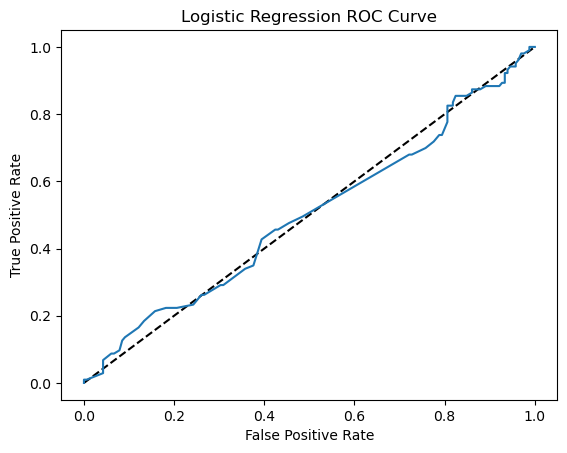

In [16]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0, 1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Logistic Regression ROC Curve')
plt.show()

In [17]:
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, y_pred_probs)
ROC_AUC

0.4984407178581936

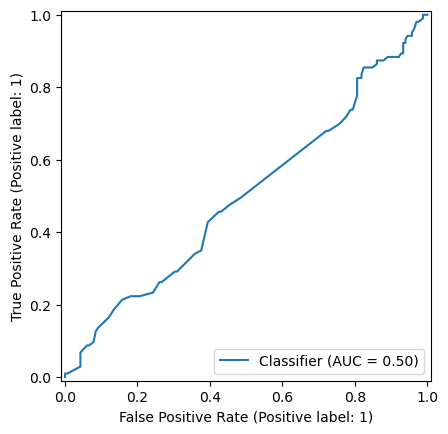

In [18]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_pred_probs);

AUC Score Interpretation:

0.5: Represents a model that performs no better than random guessing.
Below 0.5: Indicates the model is performing worse than random guessing, meaning it is incorrectly classifying instances more often than it is correctly classifying them

You are likely to see that the model does not tend to predict that individuals survived the voyage. Let's see if we can determine why.

7. Look at the average age of survivors vs. those that did not survive the voyage. What do you find?

In [21]:
Died_df = titanic_df[titanic_df['Survived'] == 0]
avg_age_died = Died_df['Age'].mean()
Survived_df = titanic_df[titanic_df['Survived'] == 1]
avg_age_survived = Survived_df['Age'].mean()
print("The average age of people who died on the titanic was {}".format(avg_age_died))
print("The average age of people who died on the titanic was {}".format(avg_age_survived))

The average age of people who died on the titanic was 30.62617924528302
The average age of people who died on the titanic was 28.343689655172415


8. Perhaps the actual age number is as important as whether a passenger was a child or an adult. Create a Boolean column that indicates whether a passenger was a child or an adult. Pick a cutoff age and if they were less than this age, label as a child. We'll see later on how we can make choosing the age part of our model building pipeline, but for now, choose an age or do some calculations to pick an age that you think might do well.

In [23]:
titanic_df['Child'] = np.where(titanic_df['Age'] < 14, True, False)

9. When imputing the missing values, you'll need to change the strategy from mean to most_frequent. Impute the missing values, then fit the model using this new variable, generate predictions, and view the confusion matrix. How did your model do?

In [25]:
X = titanic_df[['Child']].astype(int)
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
imputer =  SimpleImputer(strategy = "most_frequent")
imputer.fit(X_train)
X_train_transformed = imputer.transform(X_train)
X_test_transformed = imputer.transform(X_test)
logreg = LogisticRegression()
logreg.fit(X_train_transformed, y_train)
y_pred = logreg.predict(X_test_transformed)
confusion_matrix(y_test, y_pred)

array([[152,  13],
       [ 93,  10]], dtype=int64)

10. Generate a classification report for your model.

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
# Accuracy: the proportion of correct predictions across all classes.
# Precision: Of all the positive predictions the model made, how many were actually correct?
# Recall: Of all the actual positive instances, how many did the model correctly identify?

              precision    recall  f1-score   support

           0       0.62      0.92      0.74       165
           1       0.43      0.10      0.16       103

    accuracy                           0.60       268
   macro avg       0.53      0.51      0.45       268
weighted avg       0.55      0.60      0.52       268



In [28]:
print("60% of the time the model is accurate at predicting whether someone lived or died based on their age")
print("Precision: 43% of the time the model accurately predicted someone survived based on their age.")
print("Recall: The model detects only 10% of actual survival based on the age.")
print("F1 score: 16% value is low performance.")

60% of the time the model is accurate at predicting whether someone lived or died based on their age
Precision: 43% of the time the model accurately predicted someone survived based on their age.
Recall: The model detects only 10% of actual survival based on the age.
F1 score: 16% value is low performance.


Another important variable is the Sex variable. 

11. Create a DataFrame, X, which contains one column, Sex, and a Series, y, which contains the target variable. Perform a 70/30 train/test split, stratifying by the target variable. Make sure that you set a random_state during this split. 

If you inspect the Sex variable, you'll find that it is encoded as a string. We need to convert it to a numeric type so that our model can use it. We can do this using a [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

The OneHotEncoder is a tool in machine learning, commonly used to convert categorical data (e.g., labels or text categories) into a format that models can process—specifically, numerical arrays. It transforms each unique category into a binary vector (a series of 0s and 1s) where:

In [30]:
X = titanic_df[['Sex']]
y = titanic_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

12. Fit a OneHotEncoder to the training data and then transform both the training and test sets. Fit a model and evaluate the performance of this model.

Notice how we have used different types of transformations, an imputer for the age-related variables and a OneHotEncoder for the Sex variable. When we need to use multiple types of transformations, a [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) is useful. 

In [32]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)
logreg = LogisticRegression()
logreg.fit(X_train_encoded, y_train)
y_pred = logreg.predict(X_test_encoded)
confusion_matrix(y_test, y_pred)

array([[138,  27],
       [ 33,  70]], dtype=int64)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       165
           1       0.72      0.68      0.70       103

    accuracy                           0.78       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.78      0.77       268



In [34]:
print("78% of the time, the model accurately perdicts survival or death based on sex")
print("72% of the time, the model accurately predicts someone survives based on their sex")
print("68% of the time, the model predicts actual survival based on sex")
print("70% performance score")

78% of the time, the model accurately perdicts survival or death based on sex
72% of the time, the model accurately predicts someone survives based on their sex
68% of the time, the model predicts actual survival based on sex
70% performance score


In the next part, we'll fit a model using both the Sex column and our column indicating whether the passenger was a child. 

13. Create a DataFrame, X, which contains two columns, Sex and the child indicator column, and a Series, y, which contains the target variable. Perform a 70/30 train/test split, stratifying by the target variable. Make sure that you set a random_state during this split. Then create a ColumnTransformer which will apply a SimpleImputer to the child column and a OneHotEncoder to the Sex column. Fit it on the training data and then transform the test data. Then fit a model on this and see how well it does.

In [36]:
from sklearn.compose import ColumnTransformer
X = titanic_df[['Sex', 'Child']]
y = titanic_df['Survived']
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
ct = ColumnTransformer(
    [("Child", SimpleImputer(), ["Child"]),
     ("Sex", OneHotEncoder(), ["Sex"])])
X_train_transformed = ct.fit_transform(X_train)
X_test_transformed = ct.transform(X_test)
logreg = LogisticRegression()
logreg.fit(X_train_transformed, y_train)
y_pred = logreg.predict(X_test_transformed)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[330  54]
 [ 76 163]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       384
           1       0.75      0.68      0.71       239

    accuracy                           0.79       623
   macro avg       0.78      0.77      0.78       623
weighted avg       0.79      0.79      0.79       623



14. Create a Pipeline which contains the ColumnTransformer and the LogisticRegression model.

In [38]:
from sklearn.pipeline import Pipeline
X = titanic_df[['Sex', 'Child']]
y = titanic_df['Survived']
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
logreg = LogisticRegression()
ct = ColumnTransformer(
    [("Child", SimpleImputer(), ["Child"]),
     ("Sex", OneHotEncoder(), ["Sex"])])
steps = [("ct", ct), ("logreg", logreg)]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)
pipeline.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[330  54]
 [ 76 163]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       384
           1       0.75      0.68      0.71       239

    accuracy                           0.79       623
   macro avg       0.78      0.77      0.78       623
weighted avg       0.79      0.79      0.79       623

